# Regression

Adapted from `Chollet's Deep Learning with Python`

## Setting up

In [1]:
import keras

Using TensorFlow backend.


In [2]:
keras.__version__

'2.2.0'

In [3]:
from keras.datasets import boston_housing

In [4]:
#boston_housing.load_data?

In [5]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [6]:
x_train.shape

(404, 13)

In [7]:
x_test.shape

(102, 13)

In [8]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [9]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

## Data Preparation

In [10]:
import numpy as np

In [11]:
mean = x_train.mean(axis=0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [12]:
x_train -= mean

In [13]:
std = x_train.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [14]:
x_train /= std

In [15]:
x_test -= mean

In [16]:
x_test /= std

In [17]:
x_train.shape

(404, 13)

## Network Architecture

In [18]:
from keras import models, layers

In [19]:
model = models.Sequential()

In [20]:
model.add(layers.Dense(64, 
                       activation='relu',
                       input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, 
                       activation='relu'))
model.add(layers.Dense(1))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


What are activation functions?

`relu`: non-linear. So the NN model can learn non-linear features

Else it will be purely linear (affine) in nature

## Loss Function and Optimisers

In [22]:
from keras import optimizers

In [23]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

## Measure the Performance of the NN

Let's use some of the training data for validation

In [24]:
x_val = x_train[:x_train.shape[0]//4]
x_train_1 = x_train[x_train.shape[0]//4:]

In [25]:
y_val = y_train[:x_train.shape[0]//4]
y_train_1 = y_train[x_train.shape[0]//4:]

In [26]:
x_train_1.shape

(303, 13)

In [27]:
y_train_1.shape

(303,)

In [28]:
x_train[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [29]:
history = model.fit(x_train_1,
                    y_train_1,
                    epochs=100,
                    batch_size=1,
                    validation_data=(x_val, y_val))

Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 2s 6ms/step - loss: 202.3814 - mean_absolute_error: 10.7722 - val_loss: 35.6699 - val_mean_absolute_error: 4.0277
Epoch 2/100
303/303 [==============================] - 1s 2ms/step - loss: 30.2373 - mean_absolute_error: 3.8334 - val_loss: 20.8735 - val_mean_absolute_error: 3.1098
Epoch 3/100
303/303 [==============================] - 1s 2ms/step - loss: 21.3092 - mean_absolute_error: 3.1753 - val_loss: 20.0278 - val_mean_absolute_error: 2.9640
Epoch 4/100
303/303 [==============================] - 1s 2ms/step - loss: 18.2486 - mean_absolute_error: 2.8959 - val_loss: 18.2133 - val_mean_absolute_error: 2.7662
Epoch 5/100
303/303 [==============================] - 1s 2ms/step - loss: 16.6024 - mean_absolute_error: 2.6640 - val_loss: 14.4925 - val_mean_absolute_error: 2.6143
Epoch 6/100
303/303 [==============================] - 1s 2ms/step - loss: 15.4888 - mean_absolute_error: 2.5713 - va

Epoch 50/100
303/303 [==============================] - 1s 2ms/step - loss: 6.5820 - mean_absolute_error: 1.7012 - val_loss: 9.0582 - val_mean_absolute_error: 2.1258
Epoch 51/100
303/303 [==============================] - 1s 2ms/step - loss: 6.4808 - mean_absolute_error: 1.6267 - val_loss: 8.9928 - val_mean_absolute_error: 2.2110
Epoch 52/100
303/303 [==============================] - 1s 2ms/step - loss: 6.3355 - mean_absolute_error: 1.6529 - val_loss: 7.9733 - val_mean_absolute_error: 1.8948
Epoch 53/100
303/303 [==============================] - 1s 2ms/step - loss: 5.9795 - mean_absolute_error: 1.6531 - val_loss: 14.9157 - val_mean_absolute_error: 3.1194
Epoch 54/100
303/303 [==============================] - 1s 2ms/step - loss: 6.5591 - mean_absolute_error: 1.6040 - val_loss: 7.7643 - val_mean_absolute_error: 1.9258
Epoch 55/100
303/303 [==============================] - 1s 2ms/step - loss: 6.4371 - mean_absolute_error: 1.6016 - val_loss: 8.9263 - val_mean_absolute_error: 2.1386
Epo

In [30]:
history_dict = history.history

In [31]:
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

## Visualisation Performance

In [32]:
import matplotlib.pyplot as plt

In [33]:
epochs = range(1, len(history_dict['mean_absolute_error']) + 1)

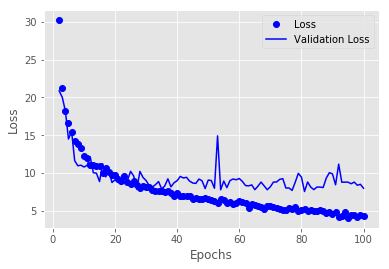

In [39]:
plt.style.use('ggplot')
plt.plot(epochs[1:], history_dict['loss'][1:], 'bo', 
         label='Loss')
plt.plot(epochs[1:], history_dict['val_loss'][1:], 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

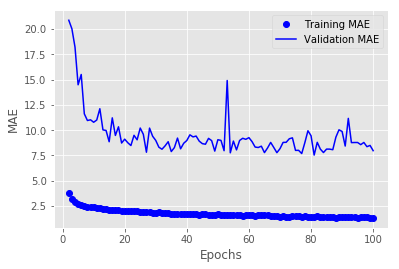

In [42]:
plt.clf()
mae_values = history_dict['mean_absolute_error']
val_mae_values = history_dict['val_loss']

plt.plot(epochs[1:], mae_values[1:], 'bo', 
         label='Training MAE')
plt.plot(epochs[1:], val_mae_values[1:], 'b',
         label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend();

In [37]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 59us/step


In [38]:
test_mae_score

2.270709645514395

***